<a href="https://colab.research.google.com/github/BJUNEJA/nomadgene/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision 
import torchvision.transforms as transforms 
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.autograd import Variable
from torchvision.utils import save_image


In [0]:
## set up hyperparameters
n_epoch = 50
batch_size_train = 100
batch_size_test = 1000
learning_rate = 0.0002
log_interval = 10
random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [0]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [0]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()       
        
        self.fc1 = nn.Linear(128, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 784)
           
    def forward(self, x): 
        x = F.leaky_relu(self.fc1(x), 0.2)
        x = F.leaky_relu(self.fc2(x), 0.2)
        return torch.tanh(self.fc3(x))

In [0]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 1)
       
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), 0.2)
        x = F.leaky_relu(self.fc2(x), 0.2)
        return torch.sigmoid(self.fc3(x))

In [0]:
G = Generator()
D = Discriminator()
criterion = nn.BCELoss() 
G_opt = optim.Adam(G.parameters(), lr = learning_rate)
D_opt = optim.Adam(D.parameters(), lr = learning_rate)

In [0]:
def G_train(x):
    G_opt.zero_grad()
    z = Variable(torch.randn(100, 128))
    y = Variable(torch.ones(100, 1))
    G_output = G(z)
    D_output = D(G_output)
    G_loss = criterion(D_output, y)
    # gradient backprop & optimize ONLY G's parameters
    G_loss.backward()
    G_opt.step()
    return G_loss.data.item()

In [0]:
def D_train(x):
    D_opt.zero_grad()
    # train discriminator on real
    x_real, y_real = x.view(-1, 28*28), torch.ones(batch_size_train, 1)
    x_real, y_real = Variable(x_real), Variable(y_real)
    D_output = D(x_real)
    D_real_loss = criterion(D_output, y_real)
    D_real_score = D_output
    z = Variable(torch.randn(100, 128))
    x_fake, y_fake = G(z), Variable(torch.zeros(100, 1))
    D_output = D(x_fake)
    D_fake_loss = criterion(D_output, y_fake)
    D_fake_score = D_output
    D_loss = D_real_loss + D_fake_loss
    D_loss.backward()
    D_opt.step()
        
    return  D_loss.data.item()

In [0]:
train_index = []
D_losses =[]
G_losses = []
epoch_list =[]
epoch_D_losses=[]
epoch_G_losses =[] 


[1/50]: loss_d: 0.695, loss_g: 2.544
[2/50]: loss_d: 0.506, loss_g: 2.845
[3/50]: loss_d: 0.383, loss_g: 3.566
[4/50]: loss_d: 0.320, loss_g: 3.992
[5/50]: loss_d: 0.284, loss_g: 4.385
[6/50]: loss_d: 0.258, loss_g: 4.772
[7/50]: loss_d: 0.233, loss_g: 4.976
[8/50]: loss_d: 0.214, loss_g: 5.163
[9/50]: loss_d: 0.198, loss_g: 5.369
[10/50]: loss_d: 0.185, loss_g: 5.565
[11/50]: loss_d: 0.173, loss_g: 5.706
[12/50]: loss_d: 0.163, loss_g: 5.863
[13/50]: loss_d: 0.155, loss_g: 5.980
[14/50]: loss_d: 0.147, loss_g: 6.135
[15/50]: loss_d: 0.140, loss_g: 6.248
[16/50]: loss_d: 0.134, loss_g: 6.344
[17/50]: loss_d: 0.128, loss_g: 6.446
[18/50]: loss_d: 0.122, loss_g: 6.582
[19/50]: loss_d: 0.117, loss_g: 6.705
[20/50]: loss_d: 0.112, loss_g: 6.822
[21/50]: loss_d: 0.108, loss_g: 6.930
[22/50]: loss_d: 0.104, loss_g: 7.048
[23/50]: loss_d: 0.100, loss_g: 7.173
[24/50]: loss_d: 0.097, loss_g: 7.323
[25/50]: loss_d: 0.093, loss_g: 7.438
[26/50]: loss_d: 0.090, loss_g: 7.548
[27/50]: loss_d: 0.08

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Generator. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Discriminator. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


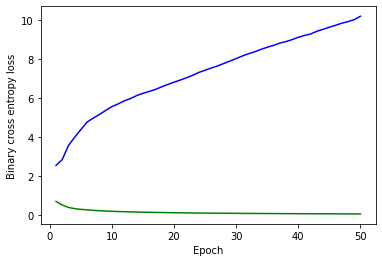

In [0]:
test_z = Variable(torch.randn(100, 128))
for epoch in range(1, n_epoch+1):           
    
    for batch_idx, (x, _) in enumerate(train_loader):
        D_losses.append(D_train(x))
        G_losses.append(G_train(x))
        train_index.append((batch_idx*32) + ((epoch-1)*len(train_loader.dataset))) 
    
    print('[%d/%d]: loss_d: %.3f, loss_g: %.3f' % (
            (epoch), n_epoch, torch.mean(torch.FloatTensor(D_losses)), torch.mean(torch.FloatTensor(G_losses))))
    
    epoch_list.append(epoch)
    epoch_D_losses.append(torch.mean(torch.FloatTensor(D_losses)))
    epoch_G_losses.append(torch.mean(torch.FloatTensor(G_losses)))
    
    
    generated = G(test_z)
    save_image(generated.view(generated.size(0), 1, 28, 28), 'Epoch_%03d.png' % (epoch))

fig = plt.figure()
plt.plot(epoch_list, epoch_D_losses, color='green')
plt.plot(epoch_list, epoch_G_losses, color='blue')
plt.xlabel('Epoch')
plt.ylabel('Binary cross entropy loss')

torch.save(G, './hw5gangen.pth')
torch.save(D,'hw5gandis.pth')